In [1]:
import pandas as pd
from mplsoccer import Pitch,Sbopen

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
parser= Sbopen()

In [3]:
df, related, freeze, tactics = parser.event(3754171)

In [4]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'foul_won_defensive', 'pass_cross',
       'aerial_won', 'out', 'technique_id', 'technique_name',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_statsbomb_xg',
       'end_z', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'off_camera', 'foul_committed_advantage',
       'foul_won_advantage', 'pass_cut_back', 'pass_goal_assist

In [5]:
df = df[df['team_name']=='Arsenal']

In [6]:
df['outcome_name'].unique()

array([nan, 'Incomplete', 'Complete', 'Unknown', 'Off T', 'Goal',
       'Lost Out', 'Won', 'Out', 'Success In Play', 'Success',
       'Pass Offside', 'Lost In Play', 'In Play Safe', 'Blocked',
       'Touched Out', 'Success To Team', 'Saved', 'Tactical', 'Injury',
       'Post'], dtype=object)

In [7]:
df['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Dribble', 'Foul Won', 'Dispossessed', 'Shot', 'Clearance', 'Duel',
       'Block', 'Pressure', 'Foul Committed', 'Miscontrol',
       'Ball Recovery', 'Dribbled Past', 'Interception', 'Goal Keeper',
       'Half End', '50/50', 'Substitution', 'Shield'], dtype=object)

In [8]:
df['player_id'].unique()

array([   nan,  3668.,  3496., 11386.,  3517.,  3475.,  3511.,  3437.,
        6746.,  3385.,  3498.,  3461.,  3604.,  3525.,  3528.])

In [9]:
passes = df[df['type_name']=='Pass']
filtered = passes[['player_name','x','y','end_x', 'end_y','pass_recipient_name','outcome_id','outcome_name']]

In [10]:
filtered[filtered['outcome_name'].isnull()]

,player_name,x,y,end_x,end_y,pass_recipient_name,outcome_id,outcome_name
4,Theo Walcott,60.0,40.0,60.1,37.7,Mesut Özil,NaN,NaN
7,Mesut Özil,59.8,37.5,45.9,43.1,Santiago Cazorla González,NaN,NaN
15,Mesut Özil,77.3,46.9,84.7,55.3,Aaron Ramsey,NaN,NaN
20,Aaron Ramsey,73.9,61.1,48.2,60.5,Per Mertesacker,NaN,NaN
23,Per Mertesacker,48.4,60.5,56.2,71.6,Aaron Ramsey,NaN,NaN
...,...,...,...,...,...,...,...,...
3666,Héctor Bellerín Moruno,56.0,70.0,43.0,66.2,Per Mertesacker,NaN,NaN
3669,Per Mertesacker,44.7,65.2,55.8,78.2,Héctor Bellerín Moruno,NaN,NaN
3671,Héctor Bellerín Moruno,55.8,77.3,68.8,76.8,Alex Oxlade-Chamberlain,NaN,NaN
3673,Alex Oxlade-Chamberlain,71.4,77.5,76.0,66.6,Héctor Bellerín Moruno,NaN,NaN


In [11]:
df_lineup = parser.lineup(3754171)
jersey_data=df_lineup[['player_id','jersey_number']]

In [12]:
df= pd.merge(df,jersey_data,on='player_id')


In [13]:
#player id is the jersey number
df['passer'] = df['jersey_number']
passes = df[df['type_name']=='Pass']
successful = passes[passes['outcome_name'].isnull()]

In [14]:
rec= pd.to_numeric(successful['pass_recipient_id'],downcast='integer')
jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
jersey_data.rename(columns={'jersey_number':'pass_recipient'},inplace=True)
successful=pd.merge(df,jersey_data,on='pass_recipient_id')
successful

/var/folders/0h/t_lvgcwd3bxfdkh778k6rtrw0000gn/T/ipykernel_12094/1439914159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
/var/folders/0h/t_lvgcwd3bxfdkh778k6rtrw0000gn/T/ipykernel_12094/1439914159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jersey_data.rename(columns={'jersey_number':'pass_recipient'},inplace=True)


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,dribble_overrun,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,pass_no_touch,shot_one_on_one,jersey_number,passer,pass_recipient
0,5b94f3b2-d60a-4aad-be61-fa1925244d05,5,1,00:00:00.886000,0,0,2,0.342259,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,11
1,320f2368-be42-447e-ae0c-6e6351e88919,8,1,00:00:01.383000,0,1,2,0.905431,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,19
2,86620139-6adb-4262-9233-7203f6b928a8,12,1,00:00:04.559000,0,4,2,2.517958,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,16
3,38810a5c-c419-4e71-85e5-b1460556ec42,16,1,00:00:08.495000,0,8,2,0.732097,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,16
4,29345179-44ae-4804-a85b-167bbbf2ed58,21,1,00:00:12.185000,0,12,2,2.405393,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,6b7bc224-0648-4ba9-8f5d-0fe278100971,3670,2,00:43:57.387000,88,57,175,1.466081,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,24
389,c3ba0421-3d83-4bc7-9f64-b20779bb36d9,3672,2,00:44:00.340000,89,0,175,1.075938,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,24,15
390,24fa3e60-4ed2-45c5-b3d8-4392ac854d5f,3674,2,00:44:02.005000,89,2,175,1.435729,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,24
391,7733c3a1-9587-43f4-a39e-7de90ed6c868,3734,2,00:46:29.279000,91,29,179,3.993361,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,12


In [15]:
subs = df[df['type_name']=='Substitution']
subs = subs['minute']
firstSub=subs.min()

In [16]:
firstSub

74

In [17]:
successful = successful[successful['minute']<firstSub]

In [18]:
successful

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,dribble_overrun,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,pass_no_touch,shot_one_on_one,jersey_number,passer,pass_recipient
0,5b94f3b2-d60a-4aad-be61-fa1925244d05,5,1,00:00:00.886000,0,0,2,0.342259,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,11
1,320f2368-be42-447e-ae0c-6e6351e88919,8,1,00:00:01.383000,0,1,2,0.905431,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,19
2,86620139-6adb-4262-9233-7203f6b928a8,12,1,00:00:04.559000,0,4,2,2.517958,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,16
3,38810a5c-c419-4e71-85e5-b1460556ec42,16,1,00:00:08.495000,0,8,2,0.732097,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,16
4,29345179-44ae-4804-a85b-167bbbf2ed58,21,1,00:00:12.185000,0,12,2,2.405393,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,a34934c9-3772-48ab-bde0-bd366bea2433,3048,2,00:27:58.484000,72,58,136,1.042920,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,16
347,6bf44147-aefe-42bc-b02d-8d9a8ed33430,3051,2,00:28:01.988000,73,1,136,1.209362,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,16,4
348,bf992e90-c2bb-4cdb-8d10-b07310e4a529,3054,2,00:28:05.977000,73,5,136,1.330412,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5
349,2b9876ee-be79-49c4-885c-38477f026a14,3058,2,00:28:07.551000,73,7,136,1.035535,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,18


In [19]:
successful.dtypes


id                 object
index               int64
period              int64
timestamp          object
minute              int64
                    ...  
pass_no_touch      object
shot_one_on_one    object
jersey_number       int64
passer              int64
pass_recipient      int64
Length: 74, dtype: object

In [20]:
successful

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,dribble_overrun,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,pass_no_touch,shot_one_on_one,jersey_number,passer,pass_recipient
0,5b94f3b2-d60a-4aad-be61-fa1925244d05,5,1,00:00:00.886000,0,0,2,0.342259,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,11
1,320f2368-be42-447e-ae0c-6e6351e88919,8,1,00:00:01.383000,0,1,2,0.905431,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,19
2,86620139-6adb-4262-9233-7203f6b928a8,12,1,00:00:04.559000,0,4,2,2.517958,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,16
3,38810a5c-c419-4e71-85e5-b1460556ec42,16,1,00:00:08.495000,0,8,2,0.732097,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,11,16
4,29345179-44ae-4804-a85b-167bbbf2ed58,21,1,00:00:12.185000,0,12,2,2.405393,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,a34934c9-3772-48ab-bde0-bd366bea2433,3048,2,00:27:58.484000,72,58,136,1.042920,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,16
347,6bf44147-aefe-42bc-b02d-8d9a8ed33430,3051,2,00:28:01.988000,73,1,136,1.209362,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,16,4
348,bf992e90-c2bb-4cdb-8d10-b07310e4a529,3054,2,00:28:05.977000,73,5,136,1.330412,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5
349,2b9876ee-be79-49c4-885c-38477f026a14,3058,2,00:28:07.551000,73,7,136,1.035535,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,18


In [21]:
df['pass_recipient_id'].unique()

array([ 3496.,    nan, 11386.,  3517.,  3475.,  3511.,  3437.,  6746.,
        3385.,  3668.,  3498.,  3461.,  3604.,  3525.,  3528.])

In [22]:
average_locations= successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [23]:
average_locations

,x,y,count
passer,,,
4,38.873171,56.746341,41
5,32.787879,24.342424,33
11,69.744737,43.218421,38
14,80.518182,51.427273,11
16,53.076744,58.527907,43
17,73.800000,22.375000,20
18,49.003846,11.050000,26
19,50.238462,43.853846,52
24,49.976667,69.673333,30


In [24]:
pass_between = successful.groupby(['passer','pass_recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)
pass_between

,passer,pass_recipient,pass_count
0,4,5,5
1,4,11,3
2,4,14,4
3,4,16,7
4,4,17,1
...,...,...,...
80,34,16,3
81,34,17,3
82,34,18,2
83,34,19,8


In [25]:
pass_between= pass_between.merge(average_locations,left_on='passer',right_index=True)
pass_between


,passer,pass_recipient,pass_count,x,y,count
0,4,5,5,38.873171,56.746341,41
1,4,11,3,38.873171,56.746341,41
2,4,14,4,38.873171,56.746341,41
3,4,16,7,38.873171,56.746341,41
4,4,17,1,38.873171,56.746341,41
...,...,...,...,...,...,...
80,34,16,3,54.003333,49.183333,30
81,34,17,3,54.003333,49.183333,30
82,34,18,2,54.003333,49.183333,30
83,34,19,8,54.003333,49.183333,30


In [26]:
pass_between= pass_between.merge(average_locations,left_on='pass_recipient',right_index=True,suffixes=['','_end'])
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
0,4,5,5,38.873171,56.746341,41,32.787879,24.342424,33
1,4,11,3,38.873171,56.746341,41,69.744737,43.218421,38
2,4,14,4,38.873171,56.746341,41,80.518182,51.427273,11
3,4,16,7,38.873171,56.746341,41,53.076744,58.527907,43
4,4,17,1,38.873171,56.746341,41,73.800000,22.375000,20
...,...,...,...,...,...,...,...,...,...
80,34,16,3,54.003333,49.183333,30,53.076744,58.527907,43
81,34,17,3,54.003333,49.183333,30,73.800000,22.375000,20
82,34,18,2,54.003333,49.183333,30,49.003846,11.050000,26
83,34,19,8,54.003333,49.183333,30,50.238462,43.853846,52


In [27]:
pass_between =pass_between[pass_between['pass_count']>3]
pass_between.drop_duplicates()
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
0,4,5,5,38.873171,56.746341,41,32.787879,24.342424,33
2,4,14,4,38.873171,56.746341,41,80.518182,51.427273,11
3,4,16,7,38.873171,56.746341,41,53.076744,58.527907,43
6,4,19,7,38.873171,56.746341,41,50.238462,43.853846,52
8,4,33,8,38.873171,56.746341,41,12.048148,40.218519,27
9,4,34,4,38.873171,56.746341,41,54.003333,49.183333,30
10,5,4,6,32.787879,24.342424,33,38.873171,56.746341,41
14,5,18,4,32.787879,24.342424,33,49.003846,11.050000,26
15,5,19,11,32.787879,24.342424,33,50.238462,43.853846,52
16,5,33,4,32.787879,24.342424,33,12.048148,40.218519,27


In [28]:
average_locations['count'].values
pass_between['pass_count'].values

array([ 5,  4,  7,  7,  8,  4,  6,  4, 11,  4,  5,  7,  5,  8,  5,  4,  6,
        4,  9,  4,  5,  8,  8,  5,  4,  4,  5,  5,  9,  5,  8, 10,  6,  5,
        6,  6,  6,  6, 12,  5,  6,  5,  6,  4,  8])

In [29]:
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
0,4,5,5,38.873171,56.746341,41,32.787879,24.342424,33
2,4,14,4,38.873171,56.746341,41,80.518182,51.427273,11
3,4,16,7,38.873171,56.746341,41,53.076744,58.527907,43
6,4,19,7,38.873171,56.746341,41,50.238462,43.853846,52
8,4,33,8,38.873171,56.746341,41,12.048148,40.218519,27
9,4,34,4,38.873171,56.746341,41,54.003333,49.183333,30
10,5,4,6,32.787879,24.342424,33,38.873171,56.746341,41
14,5,18,4,32.787879,24.342424,33,49.003846,11.050000,26
15,5,19,11,32.787879,24.342424,33,50.238462,43.853846,52
16,5,33,4,32.787879,24.342424,33,12.048148,40.218519,27


In [30]:
# def create_arrow(row):
#     return mpatches.Arrow(1.2*row['x'], 0.8*row['y'], 1.2*row['x_end'], 0.8*row['y_end'], width=row['pass_count']*0.1, color='red')

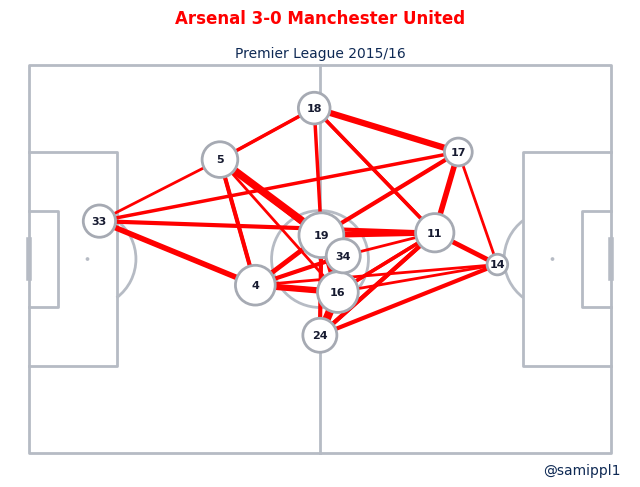

In [31]:
pitch = Pitch(pitch_color='#FFFFFF', line_color='#B6BBC4')
# Set the figure size
fig, ax = pitch.draw(figsize=(8, 6), constrained_layout=True, tight_layout=False)

# Set the face color of the figure
fig.set_facecolor('#FFFFFF')

# Draw arrows and nodes
# arrows = pitch.arrows(1.2 * pass_between.x, 0.8 * pass_between.y, 1.2 * pass_between.x_end, 0.8 * pass_between.y_end, ax=ax,color='red', alpha=0.4,width=3)
pass_lines = pitch.lines(1.2*pass_between.x, 0.8*pass_between.y, 1.2*pass_between.x_end, 0.8*pass_between.y_end, lw=pass_between.pass_count*0.5,color='red', zorder=1, ax=ax)
                 
nodes = pitch.scatter(1.2 * average_locations.x, 0.8 * average_locations.y, s=20*average_locations['count'].values, color='white', edgecolors='#a6aab3', linewidth=2, alpha=1, zorder=1, ax=ax)

                 
# Annotate average_locations
for index, row in average_locations.iterrows():
    pitch.annotate(index, xy=(1.2 * row.x, 0.8 * row.y), c='#161A30',fontweight='bold', va='center', ha='center', size=8, ax=ax)

# Add the endnote
ax.text(114, 85, '@samippl1', color='#0E2954', va='bottom', ha='center', fontsize=10)

# Add the title
ax.set_title('Arsenal 3-0 Manchester United', color='red', va='center', ha='center', fontsize=12,fontweight='bold',pad=20,loc='center')
ax.annotate('Premier League 2015/16', xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='#0E2954', va='top', ha='center')


plt.show()


In [32]:
nodes.

SyntaxError: invalid syntax (4011902834.py, line 1)